In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import kid_readout.analysis.archive

/home/local/lib/python2.7/site-packages/matplotlib/__init__.py:1155: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
:0: FutureWarning: IPython widgets are experimental and may change in the future.


updated file list


In [4]:
import glob

In [5]:
pkls = glob.glob('/data/detectors/pkl/2015-06-2[67]')
pkls += glob.glob('/data/detectors/pkl/2015-07*dark.pkl')
pkls.sort()

In [6]:
df = kid_readout.analysis.archive.build_simple_archive(pkls)

In [7]:
df.shape

(3136, 89)

In [7]:
df = kid_readout.analysis.archive.add_total_mmw_attenuator_turns(df)

In [8]:
def add_zbd(x):
    x['zbd_voltage'] = x[x.timestream_modulation_duty_cycle==0.5]['zbd_voltage'].iloc[0]
    return x
df = df.groupby(df.mmw_atten_total_turns).apply(add_zbd)

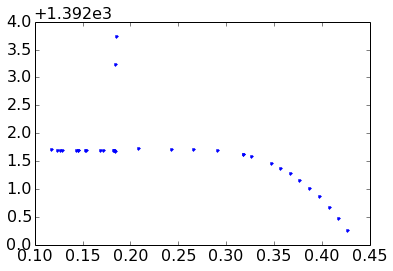

In [9]:
dd = df[(df.resonator_id==24) & (df.timestream_modulation_duty_cycle==1)]
plot(dd.sweep_primary_package_temperature,dd.f_0,'.')

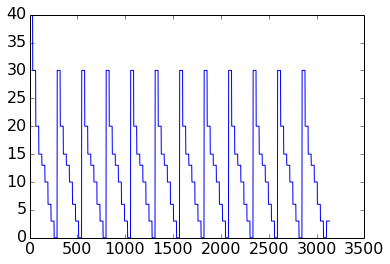

In [8]:
plot(df.atten)

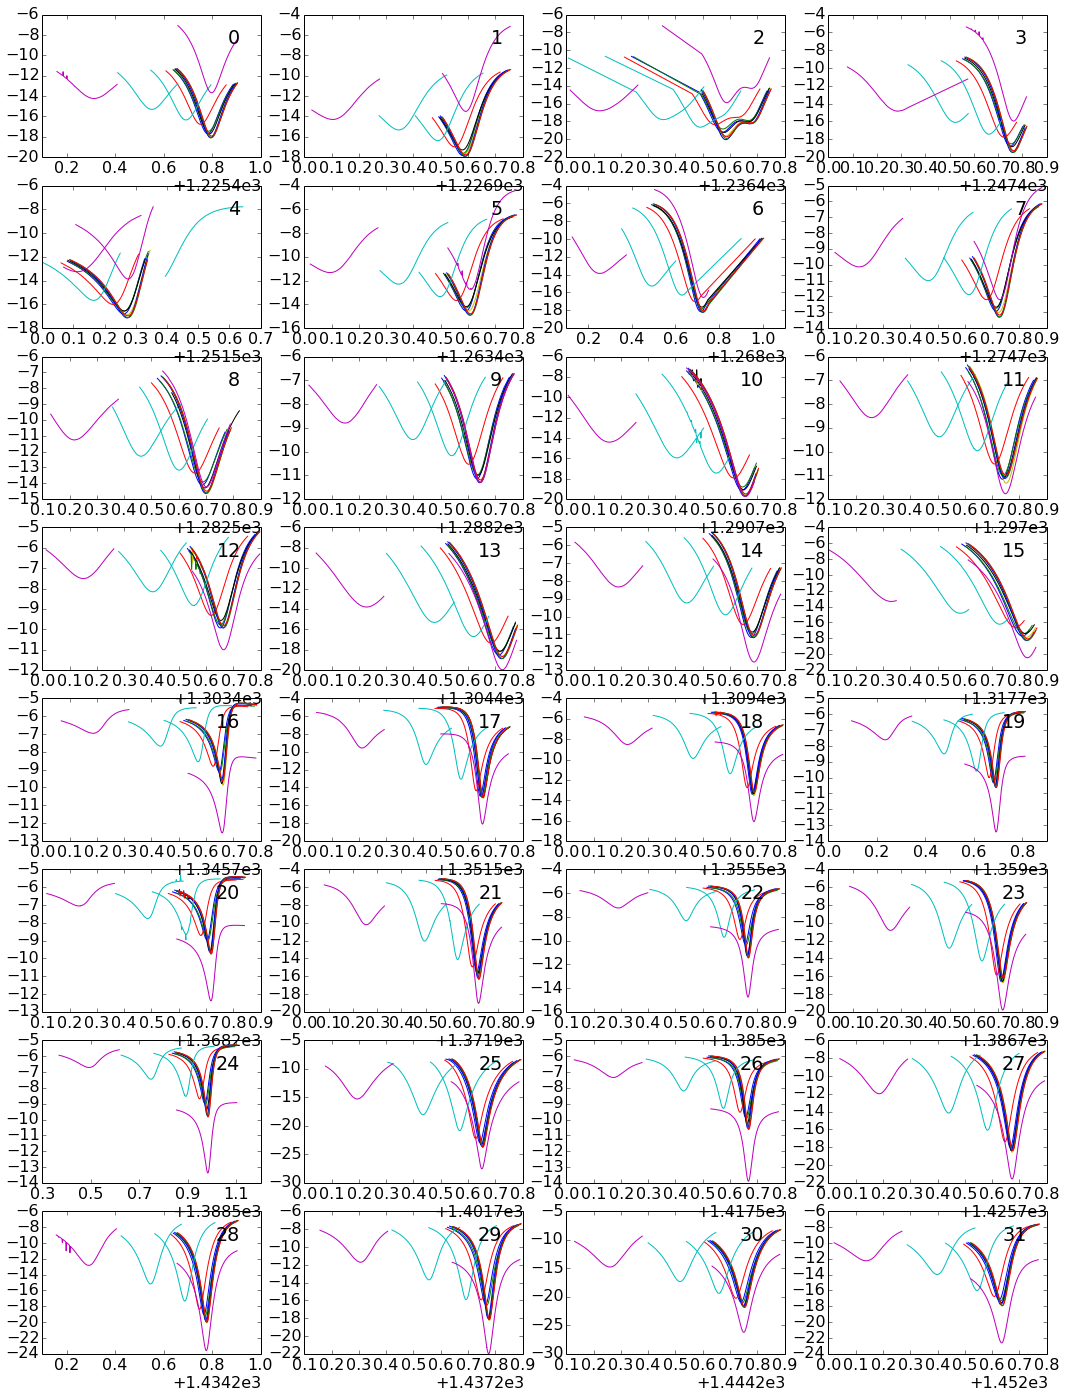

In [31]:
fig,axs = subplots(8,4,figsize=(18,24))
for k in range(32):
    dd = df[(df.resonator_id==k) & (df.atten == 6)]
    ax = axs.flatten()[k]
    for kl,row in dd.iterrows():
        ax.plot(row.sweep_freqs_MHz,20*np.log10(np.abs(row.sweep_s21)))
    ax.text(0.9,0.9,str(k),transform=ax.transAxes,ha='right',va='top',size='large')
        #ax.plot(row.sweep_freqs_MHz[::-1],np.abs(row.sweep_s21)/row.A_mag)        

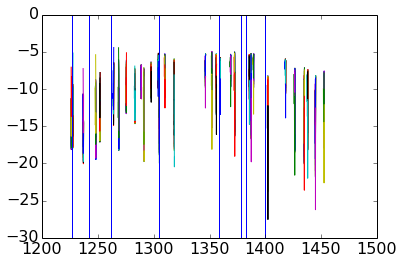

In [34]:
fs = [
1226.36570066,
1242.08472407,
1261.91302374,
1305.12236262,
1358.42944909,
1378.18257116,
1383.14315182,
1399.34407123]
dd = df[df.atten==6]
for k,row in dd.iterrows():
    plot(row.sweep_freqs_MHz,20*np.log10(np.abs(row.sweep_s21)))
ax = gca()
for ff in fs:
    ax.axvline(ff)

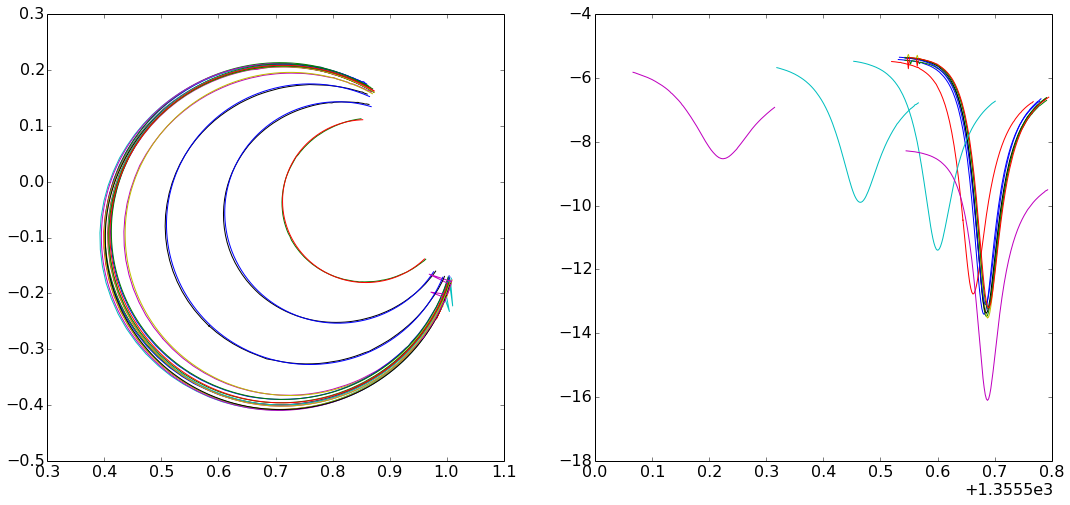

In [13]:
dd = df[(df.resonator_id==18) & (df.timestream_modulation_duty_cycle>=0)&(df.atten==6)]# & (df.a.isnull())]
fig,(ax1,ax2) = subplots(1,2,figsize=(18,8))
for k,row in dd.iterrows():
    ax1.plot(row.sweep_normalized_s21.real,row.sweep_normalized_s21.imag)
    ax1.plot(row.sweep_model_normalized_s21.real,row.sweep_model_normalized_s21.imag)
    
    ax2.plot(row.sweep_freqs_MHz,20*np.log10(np.abs(row.sweep_s21)))

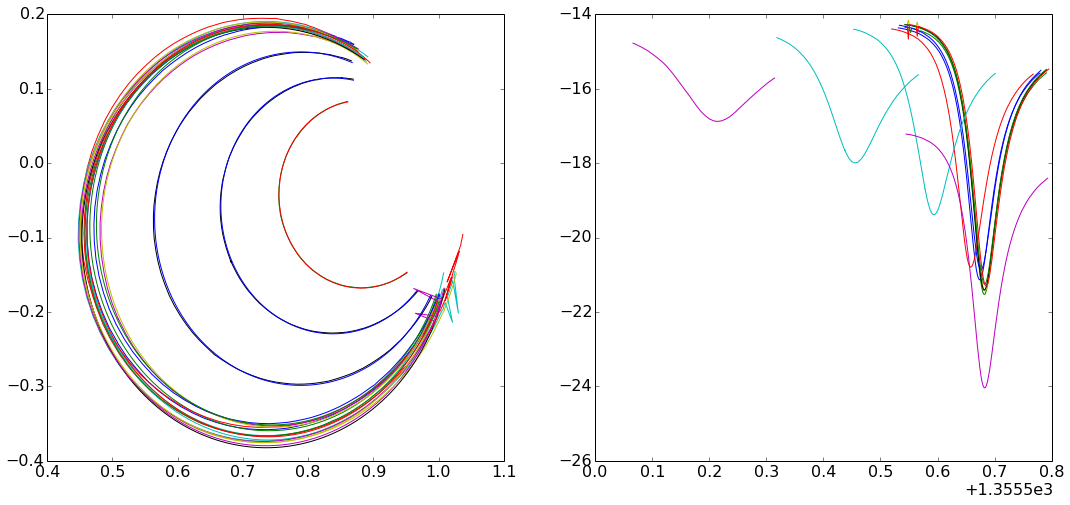

In [15]:
dd = df[(df.resonator_id==18)&(df.atten==15)]# & (df.a.isnull())]
fig,(ax1,ax2) = subplots(1,2,figsize=(18,8))
for k,row in dd.iterrows():
    ax1.plot(row.sweep_normalized_s21.real,row.sweep_normalized_s21.imag)
    ax1.plot(row.sweep_model_normalized_s21.real,row.sweep_model_normalized_s21.imag)
    
    ax2.plot(row.sweep_freqs_MHz,20*np.log10(np.abs(row.sweep_s21)))

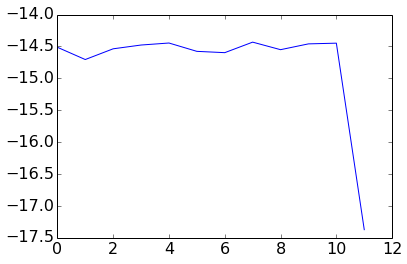

In [16]:
plot(20*np.log10(dd.A_mag))

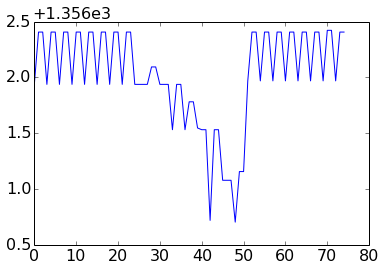

In [15]:
plot(dd.noise_measurement_freq_MHz)

In [ ]:
from kid_readout.analysis import khalil,resonator

In [ ]:
khalil.delayed_auto_guess(row.sweep_freqs_MHz,(row.sweep_s21))

In [ ]:
res1 = resonator.fit_best_resonator(row.sweep_freqs_MHz,row.sweep_s21,errors=row.sweep_errors,delay_estimate=-31.3,min_a=1)
res2 = resonator.fit_best_resonator(row.sweep_freqs_MHz,row.sweep_s21,errors=row.sweep_errors,delay_estimate=31.3,min_a=1)
res3 = resonator.fit_best_resonator(row.sweep_freqs_MHz,np.conj(row.sweep_s21),errors=row.sweep_errors,delay_estimate=-31.3,min_a=1)

In [ ]:
plot(res1.freq_data,np.abs(res1.model()))
plot(res2.freq_data,np.abs(res2.model()))
plot(res3.freq_data,np.abs(res3.model()))
plot(res1.freq_data,np.abs(res1.s21_data))

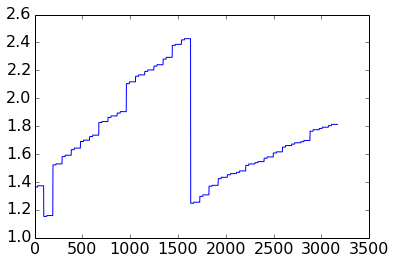

In [35]:
plot(df.sweep_primary_load_temperature)

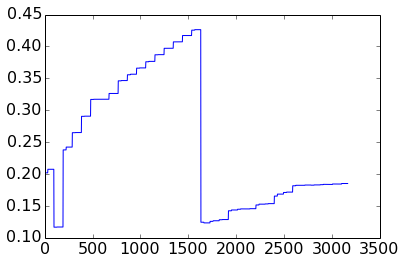

In [36]:
plot(df.sweep_primary_package_temperature
    
    )

In [37]:
s21 = row.sweep_s21
s21c = s21*np.exp(2j*np.pi*31.3*row.sweep_freqs_MHz)

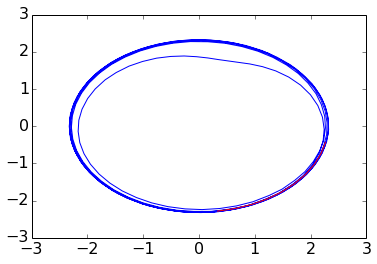

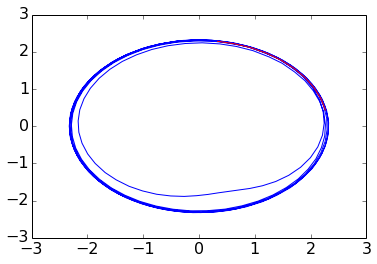

In [38]:
plot(s21c.real,s21c.imag)
plot(s21c.real[:10],s21c.imag[:10],'r')
figure()
plot(s21c.real,-s21c.imag)
plot(s21c.real[:10],-s21c.imag[:10],'r')


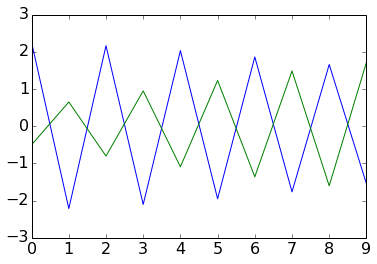

In [39]:
plot(s21.real[:10])
plot(s21.imag[:10])


In [40]:
res3.Q_e_real

NameError: name 'res3' is not defined

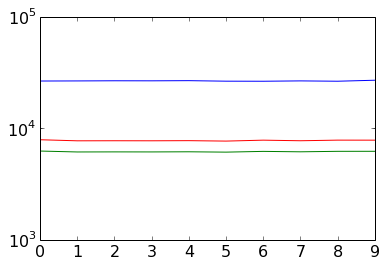

In [41]:
plot(dd.Q_e_real)
#plot(dd.Q_e_imag)
plot(dd.Q)
plot(dd.Q_i)
yscale('symlog')

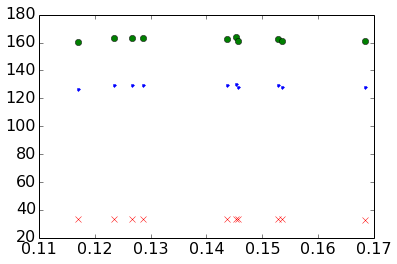

In [42]:
plot(dd.sweep_primary_package_temperature,1e6/dd.Q_i,'.')
plot(dd.sweep_primary_package_temperature,1e6/dd.Q,'o')
plot(dd.sweep_primary_package_temperature,np.real(1e6/(dd.Q_e_real+1j*dd.Q_e_imag)),'x')


#ylim(240,260)

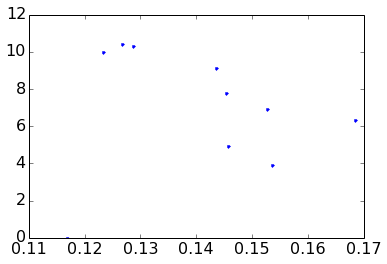

In [43]:
plot(dd.sweep_primary_package_temperature,1e6*(1-dd.f_0/dd.f_0.max()),'.')
#ylim(0,50)

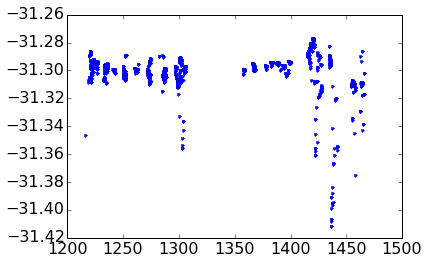

In [44]:
plot(df.f_0,df.delay,'.')

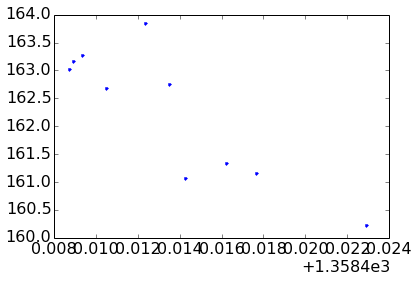

In [45]:
plot(dd.f_0,1e6/dd.Q,'.')

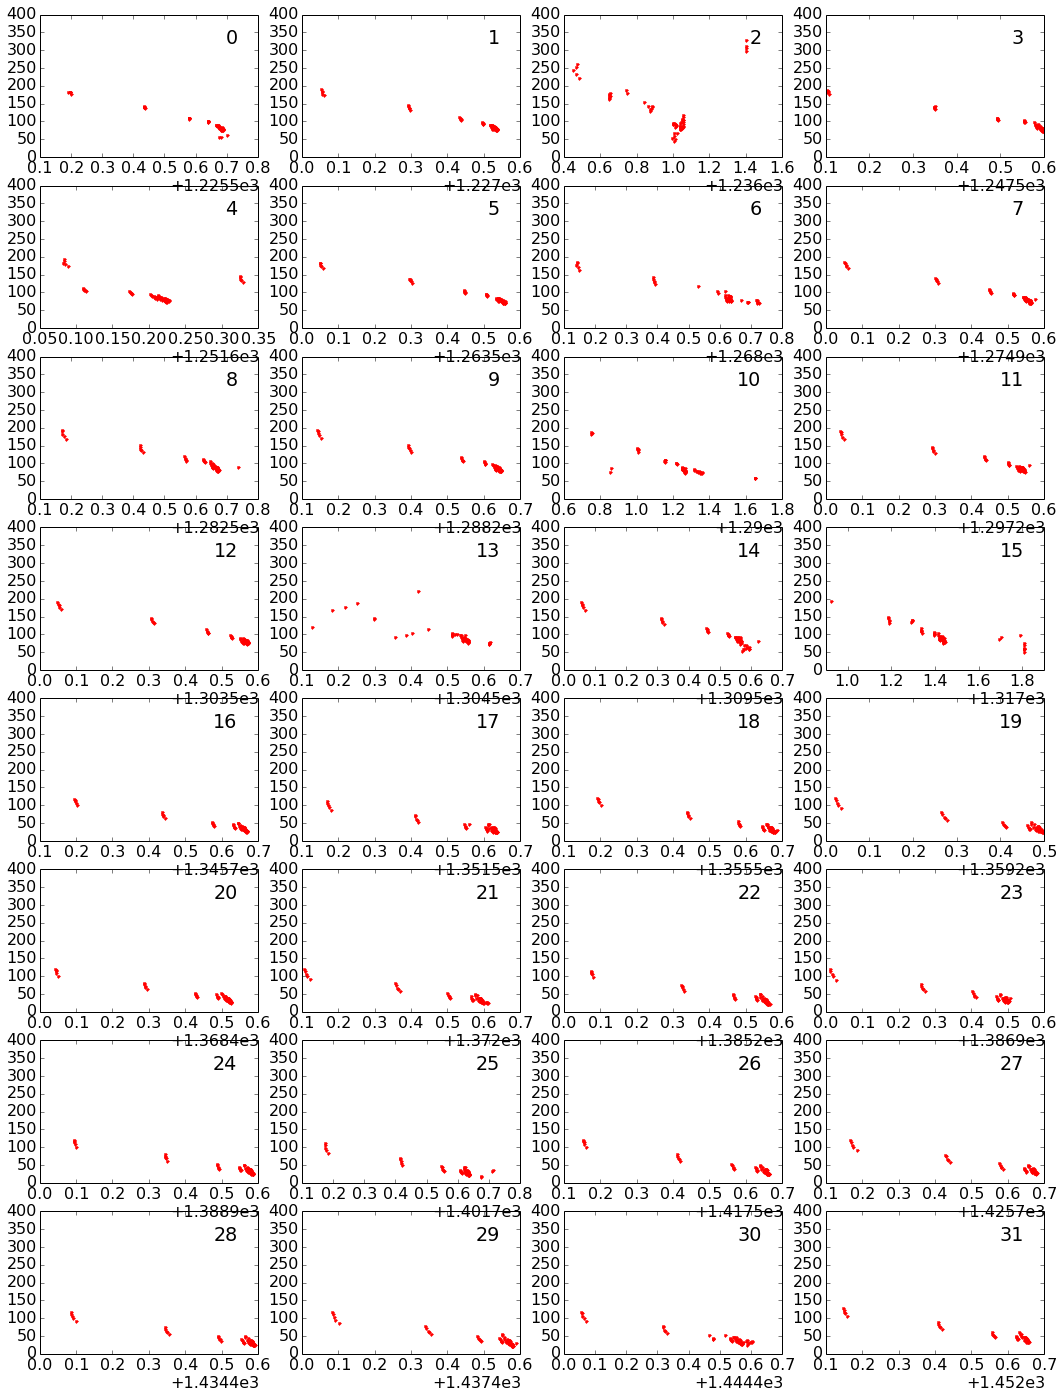

In [18]:
fig,axs = subplots(8,4,figsize=(18,24))

for k in range(32):
    ax = axs.flatten()[k]
    dd = df[(df.resonator_id==k) & (df.timestream_modulation_duty_cycle==1) & (df.atten >9)]
    ax.plot(dd.f_0,1e6/dd.Q_i,'.')
    dd = df[(df.resonator_id==k) & (df.timestream_modulation_duty_cycle==0) & (df.atten >9)]
    ax.plot(dd.f_0,1e6/dd.Q_i,'r.')
    ax.set_ylim(0,400)
    ax.text(0.9,0.9,str(k),transform=ax.transAxes,ha='right',va='top',size='large')

In [47]:
df.sweep_primary_package_temperature.min()

0.11668607286660672

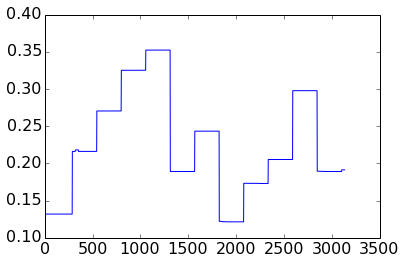

In [21]:
plot(df.sweep_primary_package_temperature)

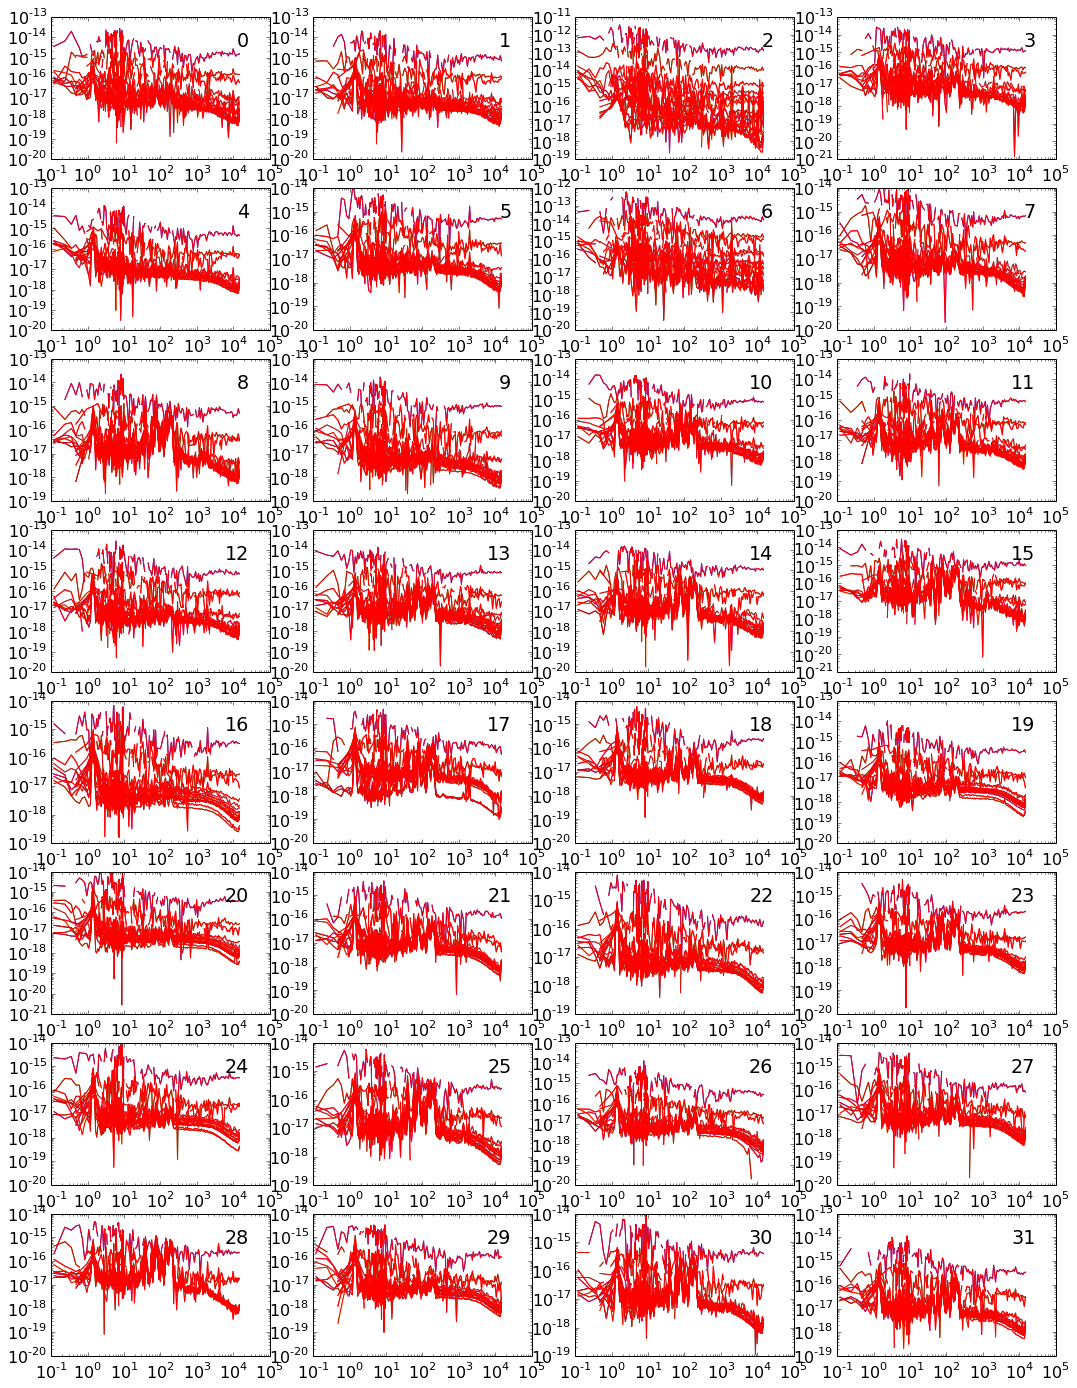

In [22]:
fig,axs = subplots(8,4,figsize=(18,24))
for k in range(32):
    dd = df[(df.resonator_id==k) & (df.sweep_primary_package_temperature<.15)]
    ax = axs.flatten()[k]
    for idx, row in dd.iterrows():
        ax.loglog(row.pca_freq,row.pca_eigvals[1,:]- np.median(row.pca_eigvals[0,80:]))
    dd = df[(df.resonator_id==k) & (df.sweep_primary_package_temperature<.15)]
    ax = axs.flatten()[k]
    for idx, row in dd.iterrows():
        ax.loglog(row.pca_freq,row.pca_eigvals[1,:]- np.median(row.pca_eigvals[0,80:]),'r')
    ax.text(0.9,0.9,str(k),transform=ax.transAxes,ha='right',va='top',size='large')

7.96766620685e-19 6.0 0.13192847769
1.02302649986e-18 6.0 0.121490290279
9.66125193394e-19 6.0 0.173040817417


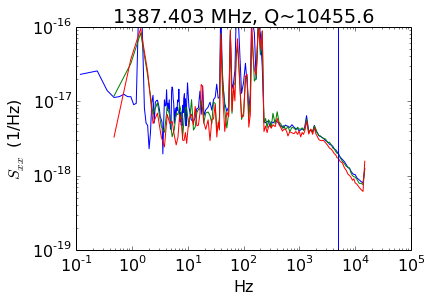

In [25]:
dd = df[(df.resonator_id==23) & (df.atten ==6) & (df.sweep_primary_package_temperature<.18)]
for k,row in dd.iterrows():
    loglog(row.pca_freq,row.pca_eigvals[1,:]- np.median(row.pca_eigvals[0,80:]))
    print np.median(row.pca_eigvals[0,80:]),row.atten,row.sweep_primary_package_temperature
    #loglog(row.pca_freq,row.pca_eigvals.T)
ax=gca()
ax.axvline(5e3)
#yscale('linear')
ylim(1e-19,1e-16)
ylabel('$S_{xx}$  (1/Hz)')
xlabel('Hz')
title('%.3f MHz, Q~%.1f' % (row.f_0,row.Q))

1.65848260003e-17 9.0 0.171665540078


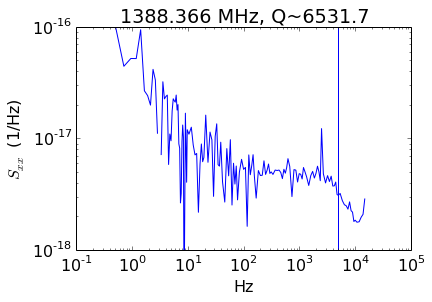

In [50]:
dd = df[(df.resonator_id==23) & (df.atten ==9) & (df.sweep_primary_package_temperature<.18)& (df.timestream_modulation_duty_cycle==1)]
for k,row in dd.iterrows():
    loglog(row.pca_freq,row.pca_eigvals[1,:]- np.median(row.pca_eigvals[0,80:]))
    print np.median(row.pca_eigvals[0,80:]),row.atten,row.sweep_primary_package_temperature
    #loglog(row.pca_freq,row.pca_eigvals.T)
ax=gca()
ax.axvline(5e3)
#yscale('linear')
ylim(1e-18,1e-16)
ylabel('$S_{xx}$  (1/Hz)')
xlabel('Hz')
title('%.3f MHz, Q~%.1f' % (row.f_0,row.Q))

2.71594935668e-17 15.0 0.116923162037
3.02383972685e-17 15.0 0.123366771734
3.0253984667e-17 15.0 0.126732758704
3.0388430878e-17 15.0 0.128612777102
3.01846688854e-17 15.0 0.14362445524
2.84889319341e-17 15.0 0.145314774046
1.61412321308e-17 12.0 0.145659854095
2.76401205989e-17 15.0 0.152765638362
1.59555899295e-17 12.0 0.15358279194
2.98133655357e-17 15.0 0.168509693882


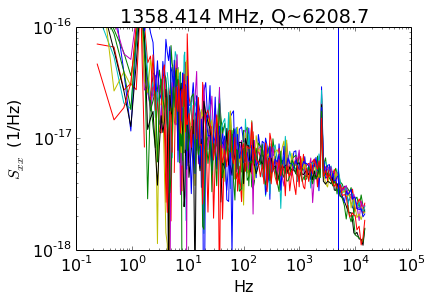

In [51]:
dd = df[(df.resonator_id==18) & (df.atten >9) & (df.sweep_primary_package_temperature<.18)& (df.timestream_modulation_duty_cycle==1)]
for k,row in dd.iterrows():
    loglog(row.pca_freq,row.pca_eigvals[1,:]- np.median(row.pca_eigvals[0,80:]))
    print np.median(row.pca_eigvals[0,80:]),row.atten,row.sweep_primary_package_temperature
    #loglog(row.pca_freq,row.pca_eigvals.T)
ax=gca()
ax.axvline(5e3)
#yscale('linear')
ylim(1e-18,1e-16)
ylabel('$S_{xx}$  (1/Hz)')
xlabel('Hz')
title('%.3f MHz, Q~%.1f' % (row.f_0,row.Q))

In [52]:
row.pca_freq[80]

147.93872833251953

In [53]:
row.Q_i

7812.764971646137

In [54]:
row.f_0*1e3/row.Q

218.79323317456635

In [55]:
1/(2*np.pi*5e3)

3.183098861837907e-05

In [56]:
row.Q_e_real

26902.04708996724

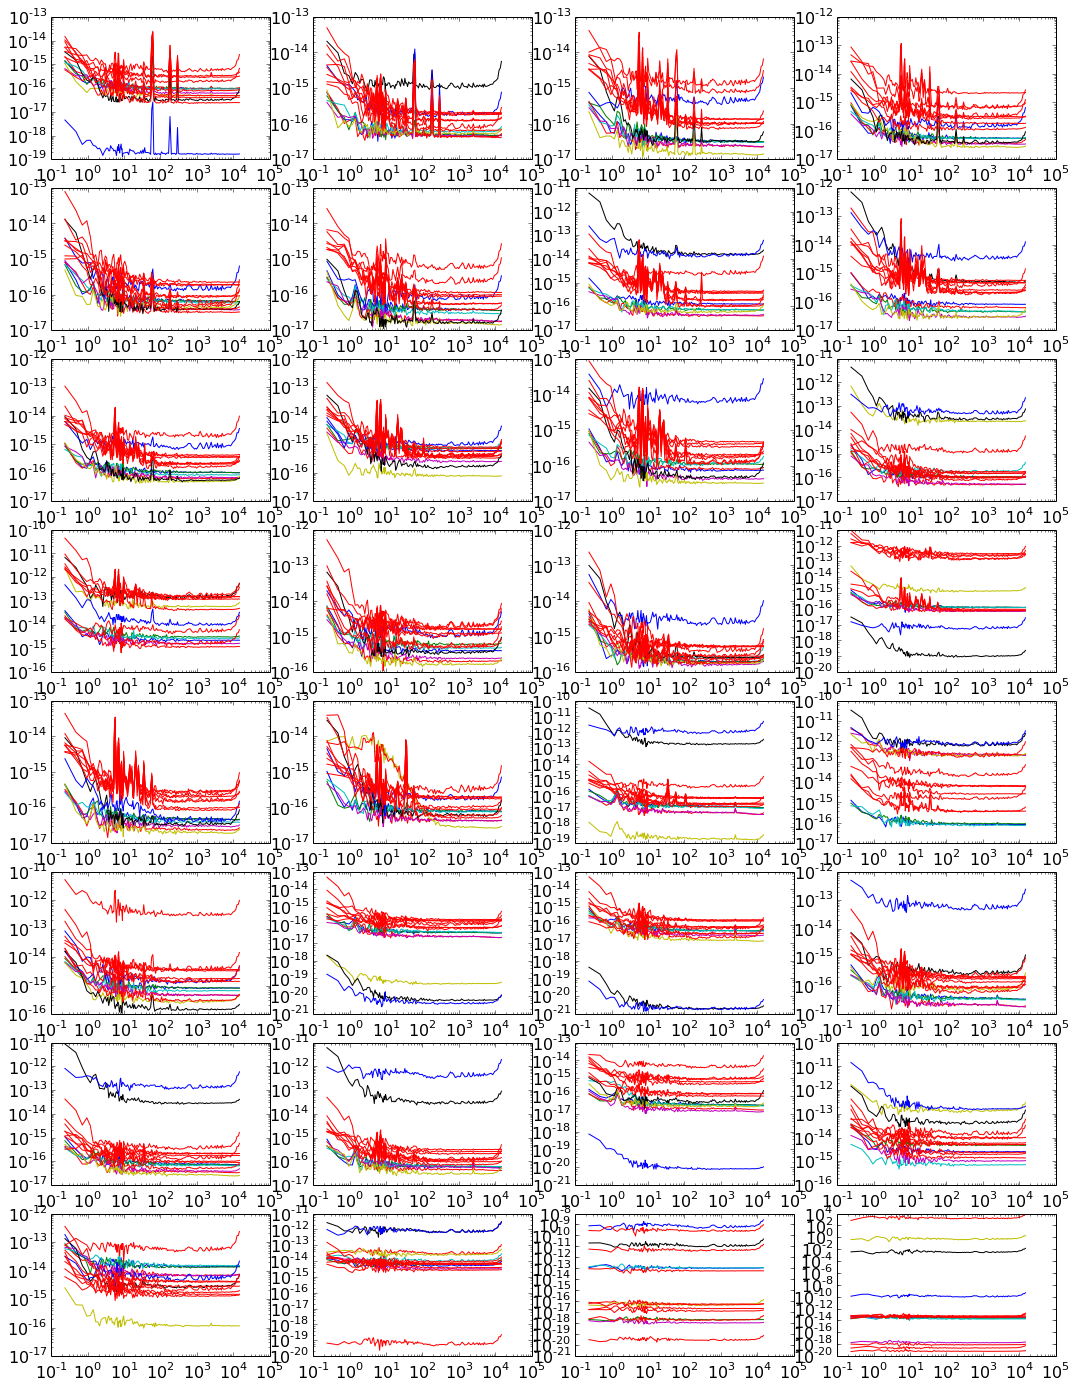

In [57]:
fig,axs = subplots(8,4,figsize=(18,24))
for k in range(32):
    dd = df[(df.resonator_id==k) & (df.atten < 15)& (df.timestream_modulation_duty_cycle==1)]
    ax = axs.flatten()[k]
    for idx, row in dd.iterrows():
        ax.loglog(row.pca_freq,row.pca_eigvals[1,:])
    dd = df[(df.resonator_id==k) & (df.atten<15)& (df.timestream_modulation_duty_cycle==0)]
    ax = axs.flatten()[k]
    for idx, row in dd.iterrows():
        ax.loglog(row.pca_freq,row.pca_eigvals[1,:],'r')

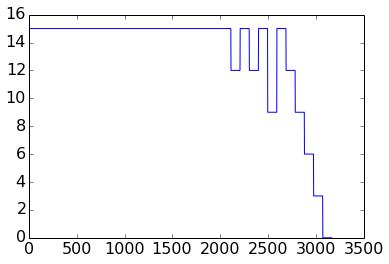

In [58]:
plot(df.atten)

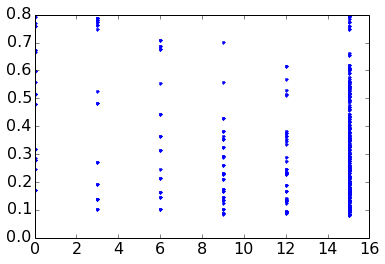

In [59]:
plot(df.atten,df.a,'.')

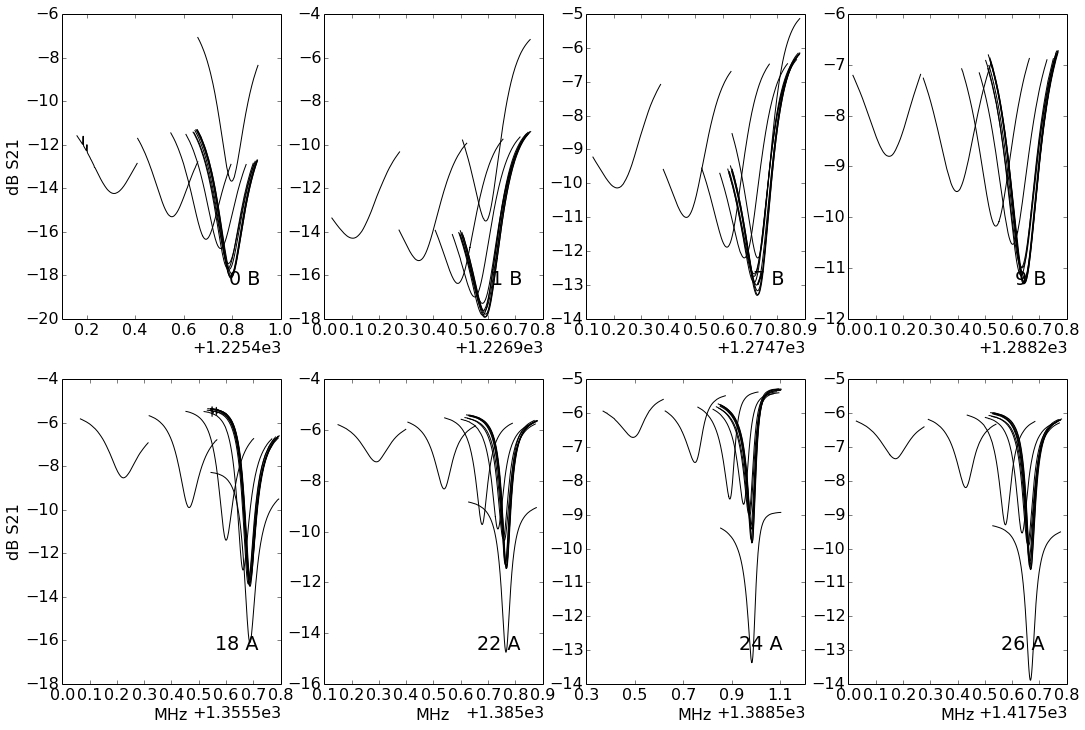

In [35]:
unique_resonator_ids = [0,1,7,9,18,22,24,26]
fig,axs = subplots(2,4,figsize=(18,12))
for k,rid in enumerate(unique_resonator_ids):
    dd = df[(df.resonator_id==rid) & (df.atten == 6)]
    if dd.f_0.iloc[0] < 1350:
        pol='B'
    else:
        pol='A'
    ax = axs.flatten()[k]
    for kl,row in dd.iterrows():
        ax.plot(row.sweep_freqs_MHz,20*np.log10(np.abs(row.sweep_s21)),'k')
#    dd = df[(df.resonator_id==rid) & (df.timestream_modulation_duty_cycle==0) & (df.atten == 15)]
#    ax = axs.flatten()[k]
#    for kl,row in dd.iterrows():
#        ax.plot(row.sweep_freqs_MHz,20*np.log10(np.abs(row.sweep_s21)),'r')
#    #ax.text(0.9,0.1,str(pol),transform=ax.transAxes,ha='right',va='bottom',size='large')
    ax.text(0.9,0.1,('%d %s' % (rid,pol)),transform=ax.transAxes,ha='right',va='bottom',size='large')
    if k % 4 == 0:
        ax.set_ylabel('dB S21')
    if k >= 4:
        ax.set_xlabel('MHz')
        #ax.plot(row.sweep_freqs_MHz[::-1],np.abs(row.sweep_s21)/row.A_mag)        

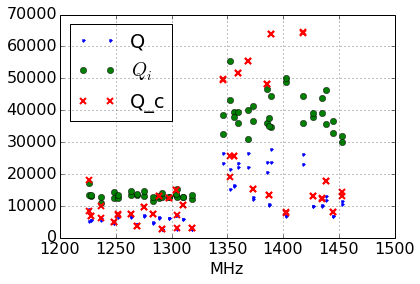

In [42]:
dd = df[(df.atten==6) & (df.sweep_primary_package_temperature<.15)]
plot(dd.f_0,dd.Q,'.',label='Q')
plot(dd.f_0,dd.Q_i,'o',label='$Q_i$')
plot(dd.f_0,dd.Q_e_real,'x',mew=2,label='Q_c')
legend(loc='upper left')
xlabel('MHz')
#ylim(0,10000)
grid()

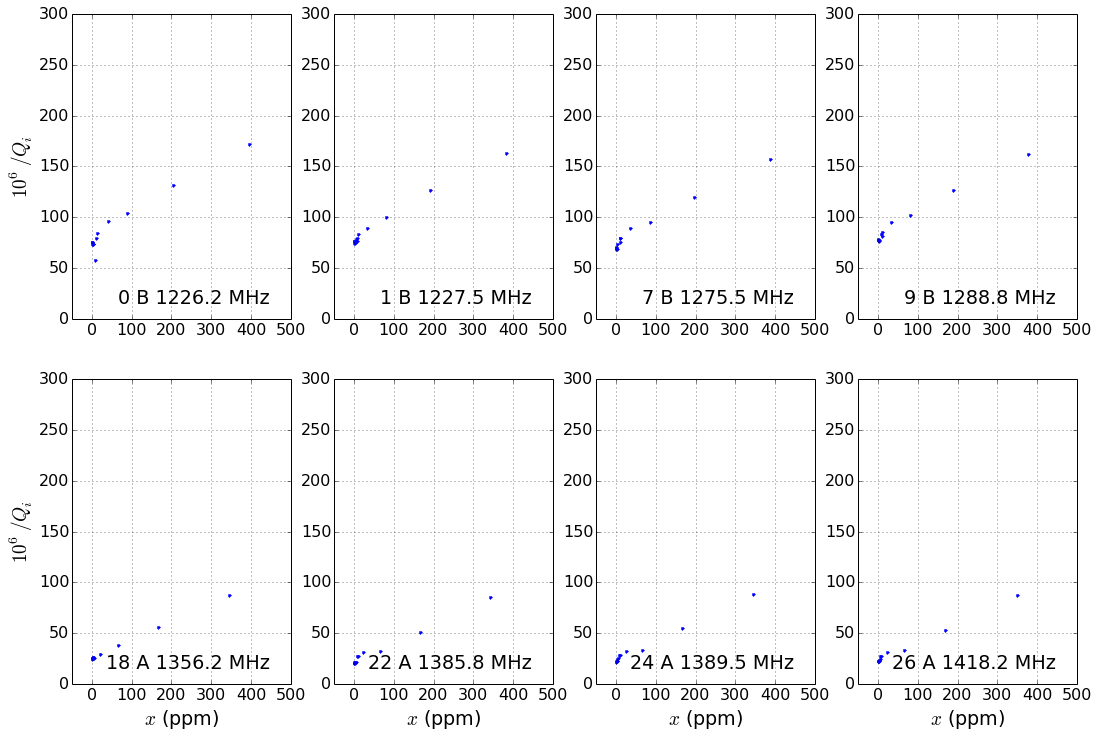

In [36]:

fig,axs = subplots(2,4,figsize=(18,12))
for k,rid in enumerate(unique_resonator_ids):
    ax = axs.flatten()[k]
    
    dd = df[(df.resonator_id==rid) & (df.atten ==6)]
    maxf = dd.f_0.max()
    if dd.f_0.iloc[0] < 1350:
        pol='B'
    else:
        pol='A'
    ax.plot(1e6*(1-dd.f_0/maxf),1e6/dd.Q_i,'.')
    maxf = dd.f_0.max()
#    dd = df[(df.resonator_id==rid) & (df.timestream_modulation_duty_cycle==0) & (df.atten >9)]
#    ax.plot(1e6*(1-dd.f_0/maxf),1e6/dd.Q_i,'r.')
#    minf = dd.f_0.min()
    if k % 4 == 0:
        ax.set_ylabel('$10^6/Q_i$',size='large')
    if k >= 4:
        ax.set_xlabel('$x$ (ppm)',size='large')
    ax.set_ylim(0,300)
    ax.set_xlim(-50,500)
    ax.grid()
    #ax.set_xlim(maxf-2,maxf+.1)
    ax.text(0.9,0.1,('%d %s %.1f MHz' % (rid,pol, maxf)),transform=ax.transAxes,ha='right',va='top',size='large')

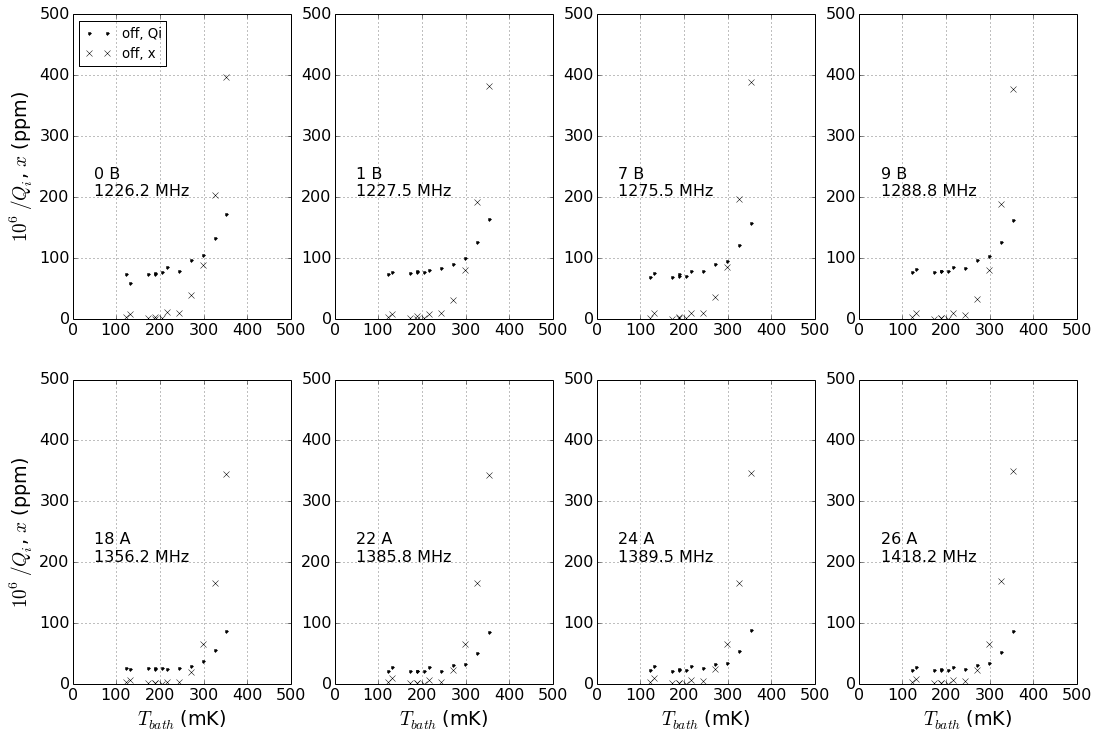

In [41]:

fig,axs = subplots(2,4,figsize=(18,12))
for k,rid in enumerate(unique_resonator_ids):
    ax = axs.flatten()[k]
    
    dd = df[(df.resonator_id==rid) &  (df.atten ==6)]
    maxf = dd.f_0.max()
    if dd.f_0.iloc[0] < 1350:
        pol='B'
    else:
        pol='A'
    ax.plot(dd.sweep_primary_package_temperature*1000,1e6/dd.Q_i,'.k',label='off, Qi')
    ax.plot(dd.sweep_primary_package_temperature*1000,1e6*(1-dd.f_0/maxf),'xk',label='off, x')
    maxf = dd.f_0.max()
    minf = dd.f_0.min()
    if k == 0:
        ax.legend(loc='upper left',prop=dict(size='small'))
    if k % 4 == 0:
        ax.set_ylabel('$10^6/Q_i$, $x$ (ppm)',size='large')
    if k >= 4:
        ax.set_xlabel('$T_{bath}$ (mK)',size='large')
    ax.set_ylim(0,500)
    ax.set_xlim(0,500)
    ax.grid()
    #ax.set_xlim(maxf-2,maxf+.1)
    ax.text(0.1,0.5,('%d %s\n%.1f MHz' % (rid,pol,maxf)),transform=ax.transAxes,ha='left',va='top')